![Title](cisco.png)

#  Lab - Visualización de medidores de Internet

## Part 1: Limpieza y análisis de datos

#### Step 1: Limpieza de datos

Cargue los datos del archivo `rpi_data_compact.csv`, que contiene las mediciones de la velocidad de Internet. En particular, el enfoque se encuentra en tres cantidades: tiempo de ping (ms), velocidad de descarga (Mbit/s) y velocidad de carga (Mbit/s).

###### a) Lea los datos de `rpi_data_compact.csv`.

In [154]:
import pandas as pd
import numpy as np

In [155]:
# Importe el archivo y lea las tres primeras filas
df_compact = pd.read_csv('rpi_data_compact.csv')
df_compact.head(3)

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25


###### b) Eliminar las columnas no deseadas

El dataframe `df_compact`  tiene una columna adicional 'Unnamed'

In [12]:
df_compact.drop(['Unnamed: 0'], axis=1, inplace = True)
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


###### c) Eliminar valores  `NaNs`.

In [13]:
NaNs_in_df = df_compact.isnull()
print(type(NaNs_in_df))
NaNs_in_df.head()

<class 'pandas.core.frame.DataFrame'>


,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


El resultado de la función `isnull` es un nuevo dataframe que contiene un valor `True` o `False`si el elemento correspondiente de la Estructura de datos es `NaN` o not. 
Con la función `sum` podemos convertir automáticamente los valores `True` en 1 y `False` en 0.  

In [14]:
NaNs_per_column = NaNs_in_df.sum()
print(type(NaNs_per_column))
NaNs_per_column.head()

<class 'pandas.core.series.Series'>


Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Date                 7
Time                 7
dtype: int64

In [15]:
# Número de NaN totales
NaNs_total = NaNs_per_column.sum()
NaNs_total

23

Es posible concatenar esta instrucción en una sola línea:

In [153]:
NaN_total = df_compact.isnull().sum().sum()
print(NaN_total)

24


Calcule la cantidad de valores faltantes como un porcentaje de todos los elementos en la estructura de datos (redondee el segundo decimal del resultado con `numpy.round`

In [103]:
Porc_NaN = np.around((NaNs_per_column*100)/NaN_total,2)
print(Porc_NaN)

Ping (ms)             4.35
Download (Mbit/s)     4.35
Upload (Mbit/s)      30.43
Date                 30.43
Time                 30.43
dtype: float64


Usa la función `dropna` para eliminar los valores `NaN`.

In [104]:
NaNs_pct = np.round(df_compact.isnull().sum().sum()/float(len(df_compact)*len(df_compact.columns))*100, decimals = 4)
print('The DataFrame contains : {} NaNs, equal to {} of the measurements'.format(NaNs_total, NaNs_pct)) 

The DataFrame contains : 23 NaNs, equal to 0.5882 of the measurements


La función `dropna`, elimina todas las filas del `DataFrame` si alguno de sus valores es `NaN'. 

In [143]:
# Remove NaN values
df_compact_clean = df_compact.dropna()
#Comprobamos que se han eliminado
NaNs_pct2 = np.round(df_compact_clean.isnull().sum().sum())
print('The DataFrame contains : {} NaNs'.format(NaNs_pct2)) 

The DataFrame contains : 0 NaNs


###### d) Cambiar el formato de los valores.

In [144]:
# Ping and Download are not floats
df_compact.dtypes

Ping (ms)             object
Download (Mbit/s)     object
Upload (Mbit/s)      float64
Date                  object
Time                  object
NaN%                  object
dtype: object

In [145]:
# Utilice la función float() para convertir un valor de cadena en formato float.
str_val = '10.56'
float_val = float(str_val)
print(str_val, type(str_val), float_val, type(float_val))

10.56 <class 'str'> 10.56 <class 'float'>


Convierta los valores de las columnas 'Ping (ms)' y 'Download (Mbit/s)' en float.

In [150]:
df_compact_clean['Ping (ms)'] = df_compact_clean['Ping (ms)'].astype('float64')
df_compact_clean['Download (Mbit/s)'] = df_compact_clean['Download (Mbit/s)'].astype('float64')

#Check that the types have been successfully converted
df_compact_clean.dtypes

Date                  object
Time                  object
Ping (ms)            float64
Download (Mbit/s)    float64
Upload (Mbit/s)      float64
dtype: object

Antes de guardar el DataFrame, se recomienda reposicionar `Upload` como última columna. Esto se puede realizar con la función `reindex`.

In [152]:
df_compact_clean = df_compact_clean.reindex(columns = ['Date', 'Time', 'Ping (ms)','Download (Mbit/s)','Upload (Mbit/s)']);
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


In [156]:
# Guardar el archivo en un csv
df_compact_clean.to_csv('./rpi_data_processed.csv', index=False)

df_clean = df_compact_clean

#### Step 2:  Estadísticas básica.

######  a) Calcule el promedio y la desviación estándar con Pandas.

In [158]:
# Code Cell 19
# Compute mean and std for all the columns of df_compact
# SOLUTION:
means = df_clean.mean()
stands = df_clean.std()

# Place mean and std for each column in a tuple
stats_ping = (means['Ping (ms)'], stands['Ping (ms)'])
stats_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
stats_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

# Print the mean value ± the standard deviation, including measuring units
print('Average ping time: {} ± {} ms'.format(stats_ping[0],stats_ping[1]))
print('Average download speed: {} ± {} Mbit/s'.format(*stats_download))
print('Average upload speed: {} ± {} Mbit/s'.format(*stats_upload))

Average ping time: 21.115451708766724 ± 5.161225495663228 ms
Average download speed: 90.44921248142644 ± 3.4656470318152284 Mbit/s
Average upload speed: 13.697607726597328 ± 1.0804708853031768 Mbit/s


###### b) Calcular la desviación mínima y máxima con Pandas.

In [160]:
mins = df_clean.min()
maxs = df_clean.max()

# Place mean and std for each column in a tuple
mima_ping = (mins['Ping (ms)'], maxs['Ping (ms)'])
mima_download = (mins['Download (Mbit/s)'], maxs['Download (Mbit/s)'])
mima_upload = (mins['Upload (Mbit/s)'], maxs['Upload (Mbit/s)'])

# Print the mean and max values, including measuring units
print('Min ping time: {} ms. Max ping time: {} ms'.format(*mima_ping))
print('Min download speed: {} Mbit/s. Max download speed: {} Mbit/s'.format(*mima_download))
print('Min upload speed: {} Mbit/s. Max upload speed: {} Mbit/s'.format(*mima_upload))

Min ping time: 16.167 ms. Max ping time: 76.528 ms
Min download speed: 58.48 Mbit/s. Max download speed: 92.87 Mbit/s
Min upload speed: 6.21 Mbit/s. Max upload speed: 14.55 Mbit/s


###### c) Use la funcióm `pandas`  `describe` .

In [161]:
df_clean.describe()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
count,673.000000,673.000000,673.000000
mean,21.115452,90.449212,13.697608
std,5.161225,3.465647,1.080471
min,16.167000,58.480000,6.210000
25%,19.115000,90.220000,13.640000
50%,20.322000,91.560000,13.980000
75%,21.843000,92.070000,14.180000
max,76.528000,92.870000,14.550000


###### d) Use `argmin`, `argmax` y `iloc`.

Con las funciones `argmin` y `argmax` de pandas, podrá encontrar las fechas y las horas correspondientes al tiempo más breve y extenso de ping, la velocidad de descarga más baja y más alta y la velocidad de carga más baja y más alta.

In [164]:
# Find the min and max ping time
argmin_ping = df_clean['Ping (ms)'].argmin()
argmax_ping = df_clean['Ping (ms)'].argmax()

# Find the min and max download speed
argmin_download = df_clean['Download (Mbit/s)'].argmin()
argmax_download = df_clean['Download (Mbit/s)'].argmax()

# Find the min and max upload speed
argmin_upload = df_clean['Upload (Mbit/s)'].argmin()
argmax_upload = df_clean['Upload (Mbit/s)'].argmax()

/srv/pl-app/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  
/srv/pl-app/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/pl-app/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  
/srv/pl-app/lib/python3.7/site-packages/ipykernel_launcher.p

The `argmin` and `argmax` functions return an index relative to a the `Dataframe` rows. To access a specific row using this index, use `iloc`.

In [165]:
# Create a small DataFrame and access its rows using iloc

# A pandas DataFrame can be initialized passing a dict as a parameter to the constructor pd.DataFrame(). 
# The key will represent the column, the values the rows.
df = pd.DataFrame({'field_1': [0,1], 'field_2': [0,2]})
df.head()

,field_1,field_2
0,0,0
1,1,2


In [166]:
# To access the field_1 of the first row using iloc()
df.iloc[1]['field_1']

1

Utilice los índices computados mediante `argmax` y `argmin` junto con `iloc` para visualizar la Fecha y la Hora de Ping máximo y mínimo, la carga y la descarga.

In [220]:
print('Ping measure reached minimum on {} at {}'.format(df_clean.loc[argmin_ping],[argmin_ping]))
print('Ping measure reached maximum on {} at {}'.format(df_clean.loc [argmax_ping],[argmax_ping]))

print('Download measure reached minimum on {} at {}'.format(df_clean.loc[argmin_download],[argmin_download]))
print('Download measure reached maximum on {} at {}'.format(df_clean.loc[argmax_download],[argmax_download]))
                                                            
print('Upload measure reached minimum on {} at {}'.format(df_clean.loc[argmin_upload],[argmin_upload]))
print('Upload measure reached maximum on {} at {}'.format(df_clean.loc[argmax_upload],[argmax_upload]))

Ping measure reached minimum on Date                 2016-11-24
Time                   15:26:20
Ping (ms)                16.167
Download (Mbit/s)         91.59
Upload (Mbit/s)            13.8
Name: 217, dtype: object at [217]
Ping measure reached maximum on Date                 2016-11-24
Time                   17:30:06
Ping (ms)                76.528
Download (Mbit/s)         91.42
Upload (Mbit/s)            9.21
Name: 461, dtype: object at [461]
Download measure reached minimum on Date                 2016-11-24
Time                   14:57:55
Ping (ms)                18.818
Download (Mbit/s)         58.48
Upload (Mbit/s)           13.72
Name: 161, dtype: object at [161]
Download measure reached maximum on Date                 2016-11-24
Time                   17:02:49
Ping (ms)                  20.8
Download (Mbit/s)         92.87
Upload (Mbit/s)           13.98
Name: 407, dtype: object at [407]
Upload measure reached minimum on Date                 2016-11-24
Time                  

###### e) Correlación.

In [221]:
df_corr = df_clean.corr()
df_corr

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
Ping (ms),1.000000,-0.045626,-0.463099
Download (Mbit/s),-0.045626,1.000000,0.083690
Upload (Mbit/s),-0.463099,0.083690,1.000000


In [222]:
corr = df_corr.values
print('Correlation coefficient between ping and download: {}'.format(corr[0, 1]))
print('Correlation coefficient between ping and upload: {}'.format(corr[0, 2]))
print('Correlation coefficient between upload and download: {}'.format(corr[2, 1]))

Correlation coefficient between ping and download: -0.045626110258379995
Correlation coefficient between ping and upload: -0.4630987138300184
Correlation coefficient between upload and download: 0.08368996933725129


Las correlaciones entre descarga y ping, y entre carga y descarga está cerca de cero. Además, la correlación entre carga y ping es pequeña. Esto lleva a la conclusión de que las tres cantidades están, de hecho, mutuamente **NO correlacionadas**. 

## Part 2: Visualización de datos

#### Step 1: Crea visualización de la velocidad de Internet
Visualize the content of the `df_clean` `DataFrame`.

###### a) Import Matplotlib.

In [223]:
import matplotlib.pyplot as plt
# sentencia que nos permite crear visualizaciones dentro de la celda
%matplotlib inline 

###### b) Crear un gráfico con las estadísticas de la velocidad de Internet.
Genere un gráfico que contenga tres líneas: 
1) ping (ms) en función del tiempo, 
2) carga (Mbit/s) en función del tiempo,
3) descarga (Mbit/s) en función del tiempo. 

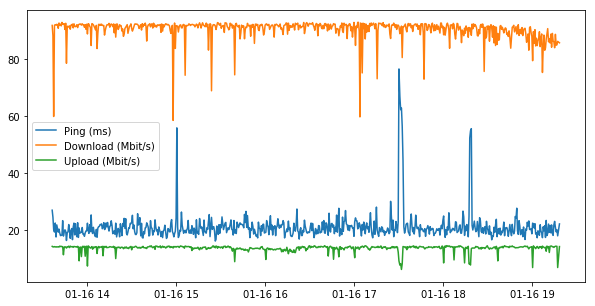

In [226]:
# Initialise figure
fig, ax = plt.subplots(figsize=(10, 5))

# Create x-axis
t = pd.to_datetime(df_clean['Time'])


# Plot three curves of different colors
ax.plot(t, df_clean['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')

# Insert legend
ax.legend()
plt.show()

###### c) Cambia el estilo de la línea.
Como las mediciones de ping incluyen variaciones grandes y abruptas, quizás puedan visualizarse mejor mediante puntos.

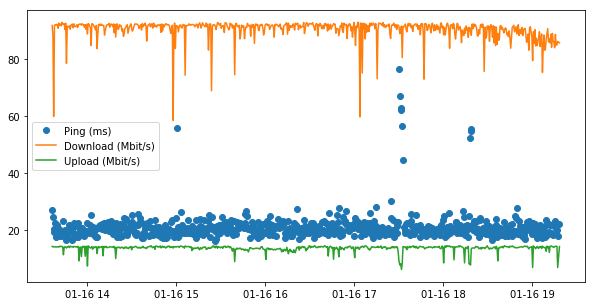

In [230]:
# Initialise figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot three curves.
t = pd.to_datetime(df_clean['Time'])

ax.plot(t, df_clean['Ping (ms)'], 'o', label='Ping (ms)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')

ax.legend()
plt.show()

###### d) Agrege etiquetas a los ejes.

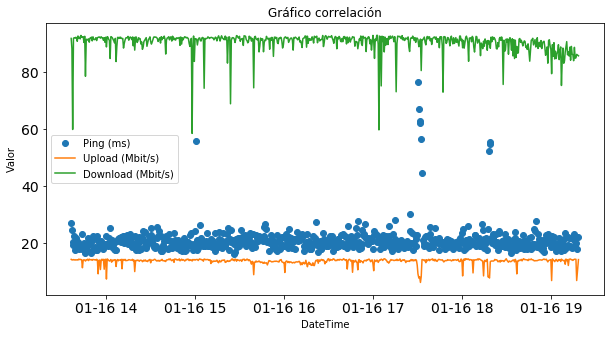

In [233]:
# Initialise figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot three curves
t = pd.to_datetime(df_clean['Time'])
ax.plot(t, df_clean['Ping (ms)'], 'o', label='Ping (ms)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')

# Insert legend
ax.legend()

# Add axis labels and title
ax.set_xlabel("DateTime")
ax.set_ylabel("Valor")
ax.set_title("Gráfico correlación")

# Change tick size
ax.tick_params(labelsize=14)

###### f) Crear un Histograma.

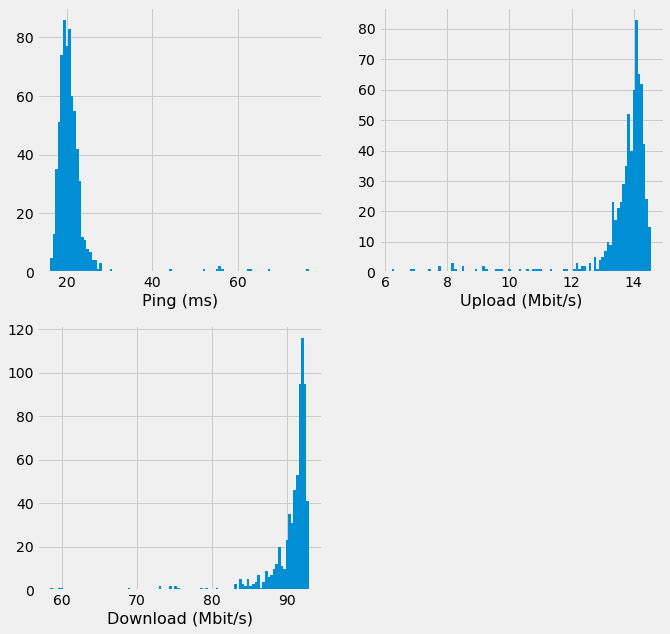

In [234]:
with plt.style.context('fivethirtyeight'):
    
    nbins = 100
    # Initialize figure
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0][0].hist(df_clean['Ping (ms)'], nbins)
    ax[0][0].set_xlabel('Ping (ms)', fontsize=16)
    ax[0][0].tick_params(labelsize=14)
    ax[0][1].hist(df_clean['Upload (Mbit/s)'], nbins)
    ax[0][1].set_xlabel('Upload (Mbit/s)', fontsize=16)
    ax[0][1].tick_params(labelsize=14)
    ax[1][0].hist(df_clean['Download (Mbit/s)'], nbins)
    ax[1][0].set_xlabel('Download (Mbit/s)', fontsize=16)
    ax[1][0].tick_params(labelsize=14)
    ax[1][1].set_visible(False)

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>